Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png. Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

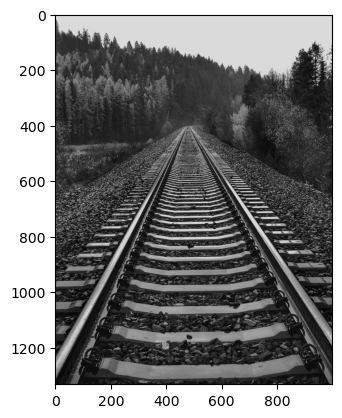

In [35]:
img = cv.imread('railway.jpeg', 0)
plt.imshow(img, cmap='gray')

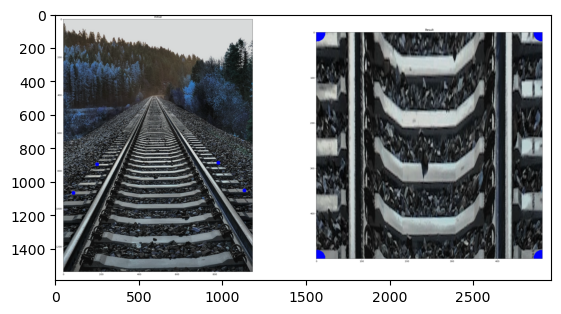

In [24]:
img = cv.imread('railway_result.png')
plt.imshow(img)

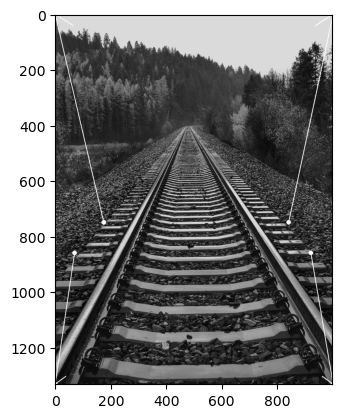

In [84]:
img = cv.imread('railway.jpeg', 0)
img_copy = np.copy(img)

height, width = img.shape
pts1 = [
    [175, 750],
    [70, 860],
    [840, 750],
    [920, 860]
]

pts2 = [
    [0, 0],
    [0, height],
    [width, 0],
    [width, height]
]

WHITE = (255, 255, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_copy, center=p1, radius=5, color=WHITE, thickness=5)
    cv.circle(img_copy, center=p2, radius=5, color=WHITE, thickness=5)
    cv.arrowedLine(img_copy, p1, p2, color=WHITE, thickness=2)

plt.imshow(img_copy, cmap='gray')

In [85]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(img, M, (width, height))

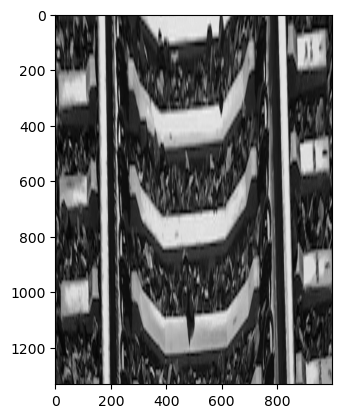

In [86]:
plt.imshow(img_res, cmap='gray')